## **Missing data imputation**  

**Imputation** is the act of replacing missing data with statistical estimates of the missing values. There are multiple techniques for missing data imputation:-

  1. Mean / Median / Mode imputation

  2. Random Sample Imputation

  3. Replacement by Arbitrary Value

  4. End of Distribution Imputation

  5. Missing Value Indicator
  
  6. Multivariate imputation
  
*Note: We will be using Titanic dataset for over analysis*

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
%matplotlib inline

os.chdir('/Users/appus/Downloads/Codes')
path=os.getcwd()
print(path)

C:\Users\appus\Downloads\Codes


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head(10)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,0


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 79.8+ KB


In [5]:
# check missing values per variable
df_titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
survived          0
dtype: int64

In [6]:
# check how many observations we would drop
print('total passengers with values in all variables: ', df_titanic.dropna().shape[0])
print('total passengers in the Titanic: ', df_titanic.shape[0])
print('percentage of data without missing values: ', df_titanic.dropna().shape[0]/ np.float(df_titanic.shape[0]))

total passengers with values in all variables:  177
total passengers in the Titanic:  850
percentage of data without missing values:  0.20823529411764705


**1. Mean / Median / Mode Imputation**

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution). For categorical variables, replacement by the mode, is also known as replacement by the most frequent category

In [7]:
# Making copy of original data
df_1=df_titanic.copy()

Text(0.5, 0, 'Age')

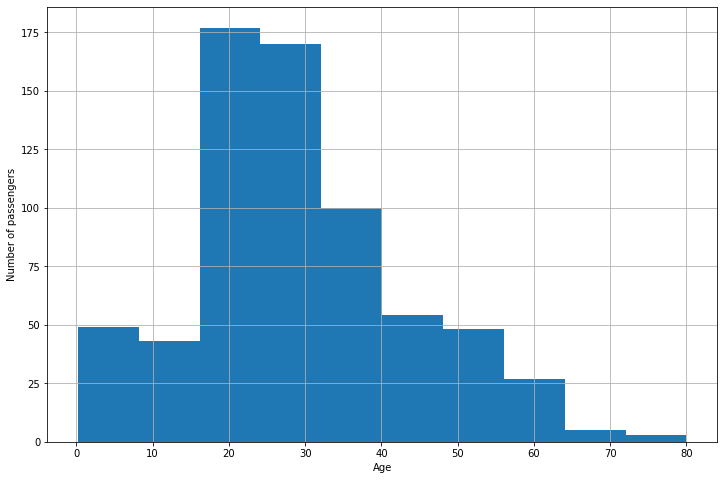

In [8]:
# plot the distribution of age to find out if they are Gaussian or skewed.

plt.figure(figsize=(12,8))
fig = df_1.age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

We can see that the age distribution is skewed. So, we will use the median imputation.

In [9]:
# calculate median of Age
median = df_1.age.median()
median

28.0

In [10]:
# impute missing values in age
df_1['age'].fillna(median, inplace=True)
df_1.age.isnull().sum()

0

**2. Random Sample imputation** 

Random sample imputation refers to randomly selecting values from the variable to replace the missing data. This technique preserves the variable distribution, and is well suited for data missing at random. Replacing of NA by random sampling for categorical variables is exactly the same as for numerical variables.

In [11]:
# New Copy
df_2 = df_titanic.copy()

In [12]:
df_2['age'+'_median'] = df_2['age'].fillna(median)
df_2['age'+'_zero'] = df_2['age'].fillna(0)
# random sampling
df_2['age'+'_random'] = df_2['age']
df_2.head()


,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,age_median,age_zero,age_random
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1,28.0,0.0,NaN
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0,38.0,38.0,38.0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0,30.0,30.0,30.0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1,54.0,54.0,54.0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0,40.0,40.0,40.0


In [13]:
# extract the random sample to fill the na
random_sample = df_2['age'].dropna().sample(df_2['age'].isnull().sum(),random_state=0)

In [14]:
# pandas needs to have the same index in order to merge datasets
random_sample.index = df_2[df_2['age'].isnull()].index
df_2['age'+'_random_sample'] = df_2['age'].fillna(random_sample)
df_2.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,age_median,age_zero,age_random,age_random_sample
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1,28.0,0.0,NaN,27.0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0,38.0,38.0,38.0,38.0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0,30.0,30.0,30.0,30.0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1,54.0,54.0,54.0,54.0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0,40.0,40.0,40.0,40.0


In [15]:
df_2.age_random_sample.isnull().sum()

0

**3. Replacement by Arbitrary Value**

Replacing missing data by any, arbitrarily determined value, but the same value for all missing data. Replacement by an arbitrary value is suitable if data is not missing at random, or if there is a huge proportion of missing values. If all values are positive, a typical replacement is -1. Alternatively, replacing by 999 or -999 are common practice. For categorical variables, this is the equivalent of replacing missing observations with the label “Missing” which is a widely adopted procedure.

In [16]:
# New Copy
df_3= df_titanic.copy()

In [17]:
def impute_na(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)

In [18]:
impute_na(df_3,'age')

In [19]:
df_3.age_zero.isnull().sum()

0

**4. End of Distribution Imputation**

This imputation technique tends to work well with tree-based algorithms, but it may affect the performance of linear models, as it distorts the variable distribution.Adding an additional variable indicating missingness may help with this task. However, the values are still missing in the original variable, and they need to be replaced if we plan to use the variable in machine learning. So, we will replace the NA, by values that are at the far end of the distribution of the variable. The rationale is that if the value is missing, it has to be for a reason.

In [20]:
# New Copy
df_4= df_titanic.copy()

<AxesSubplot:>

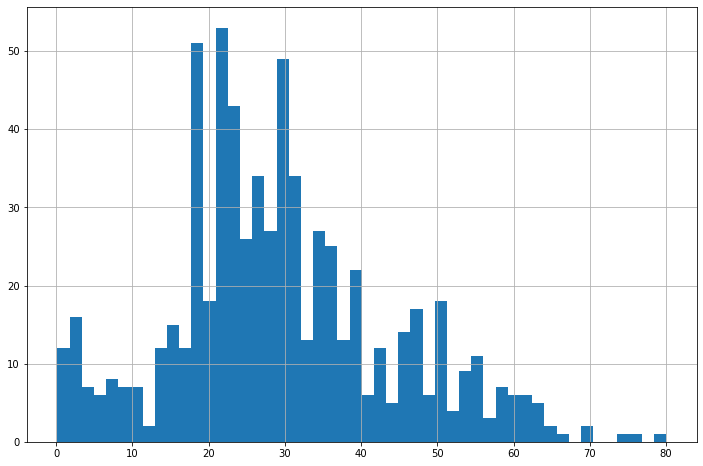

In [21]:
plt.figure(figsize=(12,8))
df_4.age.hist(bins=50)

In [22]:
df_4['age'+'_far_end'] = df_4['age'].fillna(df_4.age.mean()+3*df_4.age.std())
df_4['age'].fillna(df_4.age.median(), inplace=True)
df_4

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,age_far_end
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,NaN,Q,1,73.206577
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0,38.000000
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0,30.000000
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1,54.000000
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,0,55.000000
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,0,58.000000
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,1,24.000000
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0,3.000000


**5. Missing Value Indicator**

The missing indicator technique involves adding a binary variable. This variable takes the value 1 if the observation is missing, or 0 otherwise (we still need to replace the missing values in the original variable with mean or median). These 2 techniques in combination tend to work well with linear models. But, adding a missing indicator expands the feature space and, as multiple variables tend to have missing values for the same observations, many of these newly created binary variables could be identical or highly correlated.

In [23]:
# New Copy
df_5= df_titanic.copy()

In [24]:
# create variable indicating missingness
df_5['age_na'] = np.where(df_5['age'].isnull(), 1, 0)
# replace the NA with the median value 
df_5['age'].fillna(df_5.age.median(), inplace=True)
df_5

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,age_na
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,NaN,Q,1,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1,0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,0,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,0,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,1,0
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0,0


*If missing values are less than 5% of the variable, then go for mean/median imputation or random sample replacement. Impute by most frequent category if missing values are more than 5% of the variable. Do mean/median imputation+adding an additional binary variable to capture missingness add a 'Missing' label in categorical variables. To the exception: If we suspect that NAs are not missing at random and do not want to attribute the most common occurrence to NA, and if we don't want to increase the feature space by adding an additional variable to indicate missingness - in these cases, replace by a value at the far end of the distribution or an arbitrary value.*